In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\prana\AppData\Local\Temp\pip-install-jklbpvrr\tensorflow-gpu_cb83eacff17d4185b0d5c01fa0b767b8\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
apache-beam                   2.46.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports

In [9]:
import tensorflow as tf
import os

In [10]:
# reducing GPU memory consumption and Out Of Memory Error
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
#trying to remove images which could cause errors when I further process
# Dodgy images in clickbait and non-clickbait
import cv2
import imghdr

In [7]:
data_dir = 'Data'

In [8]:
#valid images
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
#checking list
image_exts[2]

'bmp'

In [1]:
for image_class in os.listdir(data_dir): # To get all sub directories
    for image in os.listdir(os.path.join(data_dir, image_class)): # get all images in clickbait and non clickbait
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)   # allows us to read image as numpy array
            tip = imghdr.what(image_path)  
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

NameError: name 'os' is not defined

In [2]:
# To load data
tf.data.Dataset??

Object `tf.data.Dataset` not found.


In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# Loading data on the fly using keras will resize image
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 160 files belonging to 2 classes.


In [14]:
# loop through data pipeline
data_iterator = data.as_numpy_iterator()

In [15]:
# access one batch
batch = data_iterator.next()

In [16]:
# Representing images as numpy array
# this has all the images
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

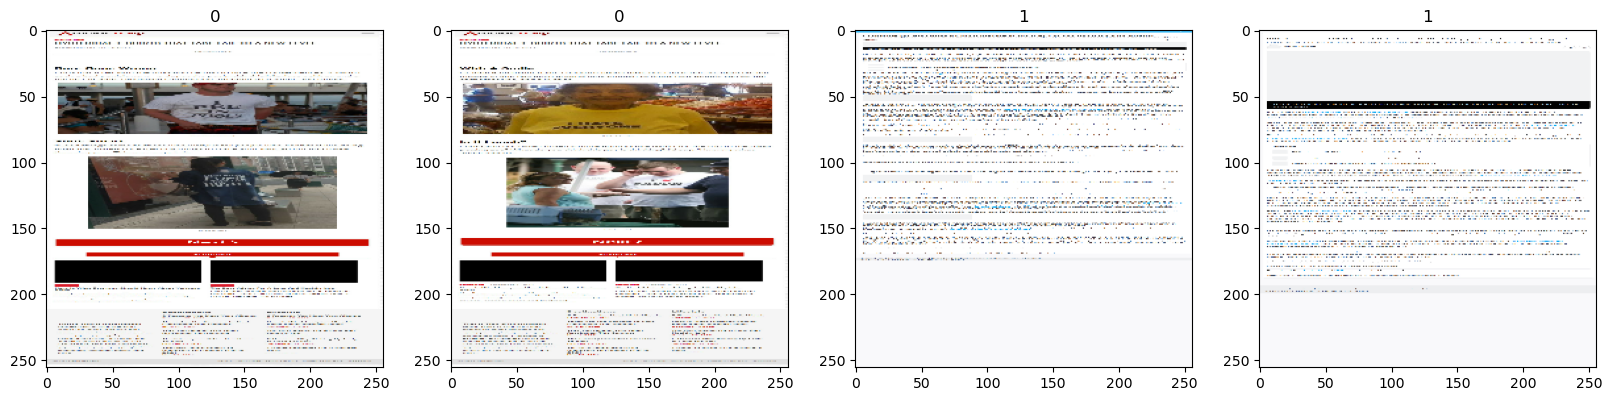

In [18]:
#figuring out if 1 is clickbait or non-clickbait and same for 0
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
# 0 for clickbait and 1 for non-clickbait from above code
# this has all the labels
batch[1]


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [20]:
# Scaling our data to improve efficiency
# we put x for images and y for label
# that is why x transformation takes place and not y

data = data.map(lambda x, y: (x/255, y))

In [21]:
# to check - 1
c

0.0

In [22]:
# to check - 2
data.as_numpy_iterator().next()[0].max()

1.0

In [23]:
# splitting data into training, test and validation
len(data)

5

In [61]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [62]:
test_size

1

In [63]:
# taking data using take and skip in tensorflow
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
#Building the deep learning models
# importing tensorflow dependecies
# MaxPooling2D used to condense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
# Start of model design
# instance of Sequential class
model = Sequential()

In [29]:
# using 3 layers of CNN

# Add layers to the model
#1st layer 16 pixels, 3X3 layers and 1 pixel at a time
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# 2nd layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

# 3rd layer
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [30]:
#compiling the neural network with adam optimizer

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
# Training the model
logdir = 'logs_dir'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 1.7275 - accuracy: 0.5208 - val_loss: 1.2949 - val_accuracy: 0.3125
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.8586 - accuracy: 0.5208 - val_loss: 0.4275 - val_accuracy: 0.9844
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.3819 - accuracy: 0.8750 - val_loss: 0.3255 - val_accuracy: 0.8281
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.2446 - accuracy: 0.9375 - val_loss: 0.1292 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.1391 - accuracy: 0.9896 - val_loss: 0.1095 - val_accuracy: 0.9844
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9844
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.0646 - accuracy: 0.9896 - val_loss: 0.0508 - val_accuracy: 0.9844
Epoch 8/20
3/3 [=========================

In [35]:
hist.history

{'loss': [1.72747004032135,
  0.8586117625236511,
  0.3818883001804352,
  0.24457216262817383,
  0.13906078040599823,
  0.03373563289642334,
  0.0645555928349495,
  0.08247807621955872,
  0.06077353656291962,
  0.03549389913678169,
  0.014855809509754181,
  0.03331717848777771,
  0.009258512407541275,
  0.02402452565729618,
  0.0015840384876355529,
  0.01423517893999815,
  0.001537492498755455,
  0.003215571166947484,
  0.003373136045411229,
  0.0019641665276139975],
 'accuracy': [0.5208333134651184,
  0.5208333134651184,
  0.875,
  0.9375,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.2948877811431885,
  0.4275345802307129,
  0.32554197311401367,
  0.1291617900133133,
  0.10951615869998932,
  0.10128188133239746,
  0.05079715698957443,
  0.0867098867893219,
  0.07401838153600693,
  0.0

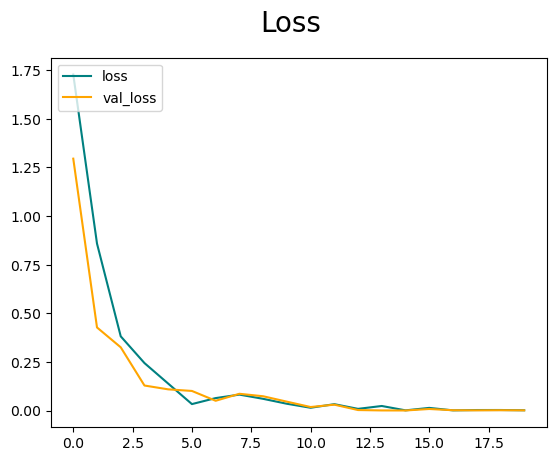

In [36]:
# plotting performance of our trained model
# just to make sure our val_loss is always less than loss
# val_loss less than loss is a good model otherwise it is overfitted
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

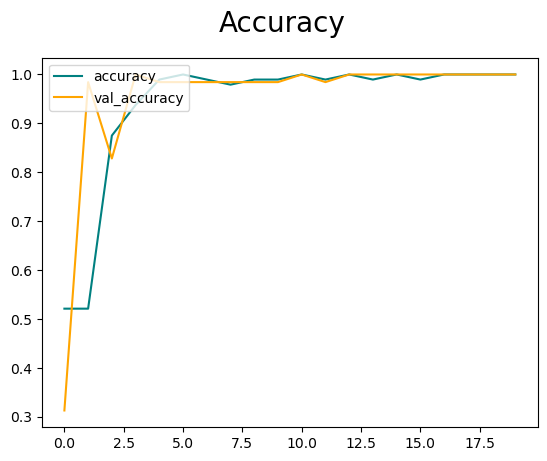

In [54]:
# evalutating accuracy vs val accuracy to make sure there is no overfitting
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [64]:
len(test)

0

In [58]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

In [60]:
print('Precision:', precision.result().numpy())
print('Recall', recall.result().numpy())
print('Accuracy', accuracy.result().numpy())

Precision: 0.0
Recall 0.0
Accuracy 0.0


In [65]:
import cv2

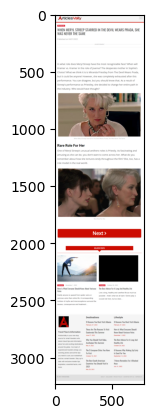

In [70]:
img = cv2.imread('Clickbait_test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

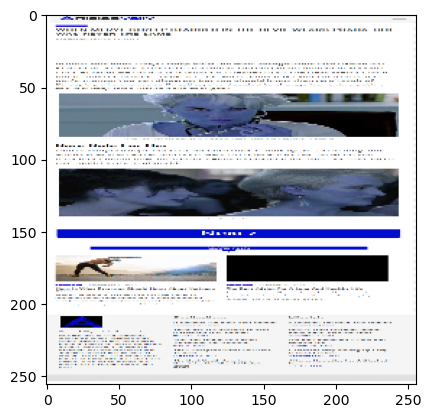

In [71]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [73]:
yhat

array([[7.038108e-05]], dtype=float32)

In [75]:
if yhat < 0.5:
    print('Web page is clickbait')
else:
    print('Web page is not clickbait')

Web page is clickbait


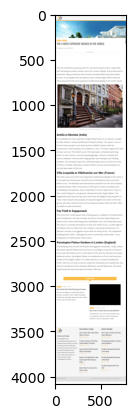

In [76]:
img = cv2.imread('NonClickbait_test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

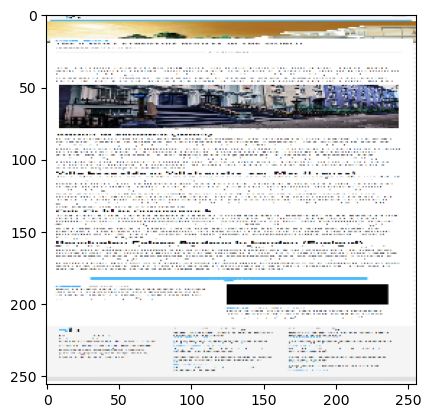

In [79]:
resize_NC = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat_NC = model.predict(np.expand_dims(resize_NC/255, 0))

1/1 [==============================] - 0s 25ms/step


In [81]:
yhat_NC

array([[0.9906569]], dtype=float32)

In [88]:
if yhat_NC < 0.5:
    print('Web page is clickbait')
else:
    print('Web page is not clickbait')

Web page is not clickbait


In [89]:
#saving model
from tensorflow.keras.models import load_model

In [87]:
model.save(os.path.join('models', 'clickbait_nonclickbait_imgdetection.h5'))